<a href="https://colab.research.google.com/github/michal-wozniak/machine-learning-bootcamp/blob/main/supervised/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Polynomial Regression - Regresja Wielomianowa](#1)
3. [Wygenerowanie danych](#2)
4. [Model liniowy](#3)
5. [Ekstrakcja cech wielomianowych - stopień 2](#4)
6. [Dopasowanie modelu](#5)
7. [Ekstrakcja cech wielomianowych - stopień 3](#6)
8. [Dopasowanie modelu](#7)
9. [Porównanie metryk](#8)

### <a name='0'></a> Import bibliotek

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.0)
sklearn.__version__

'1.3.2'

### <a name='1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik.

### Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$


### <a name='2'></a> Wygenerowanie danych

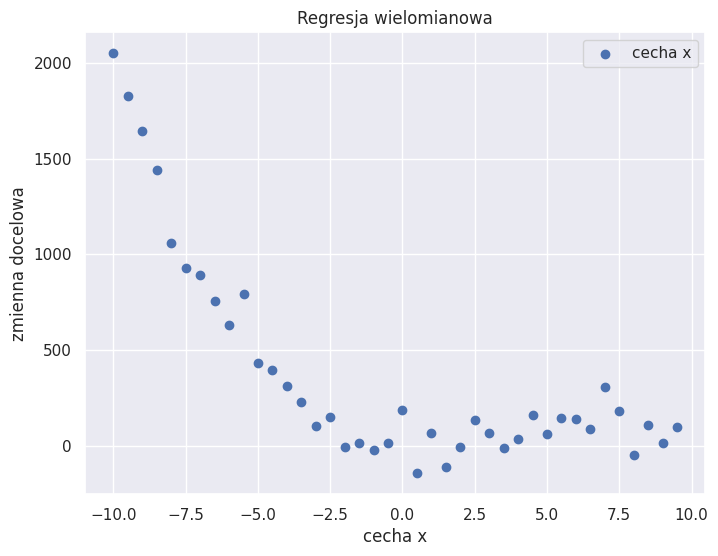

In [10]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

### <a name='3'></a> Model liniowy

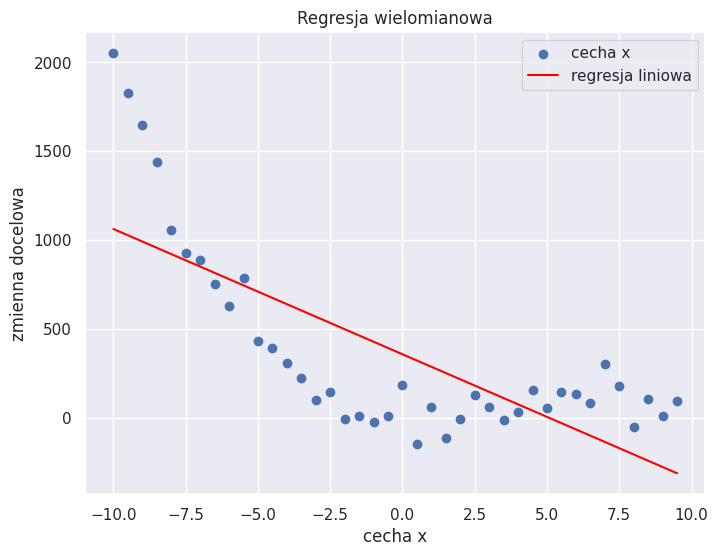

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5568355989309897

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu dla naszego problemu.

Rozważmy model regresji liniowej:
$$Y = w_0 + w_1 X_1$$
Dodając cechy wielomianowe otrzymujemy:
$$Y = w_0 + w_1 X_1 +w_2X_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$Z = [1, X_1, X_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$Y = w_0 + w_1 Z_1 + w_2 Z_2$$

###  <a name='4'></a> Ekstrakcja cech wielomianowych - stopień 2

In [14]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head(10)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [19]:
X_poly.shape

(40, 3)

In [20]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


###  <a name='5'></a> Dopasowanie modelu

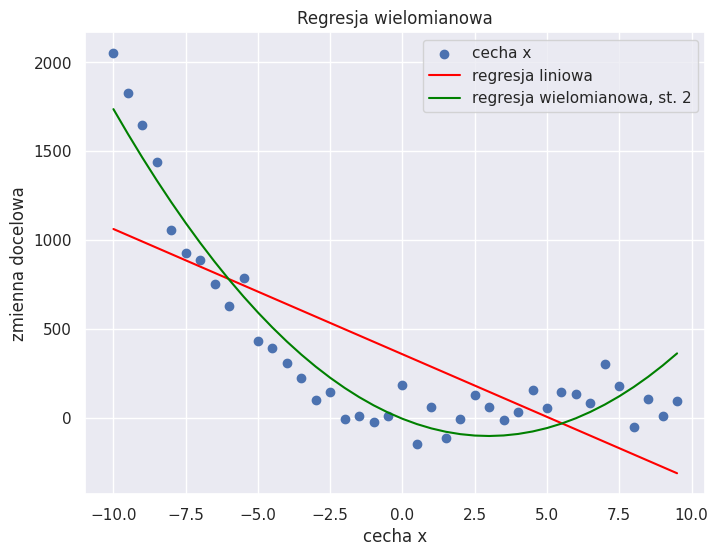

In [21]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [23]:
r2_score(y, y_pred_2)

0.9125520940632676

###  <a name='6'></a> Ekstrakcja cech wielomianowych - stopień 3

In [24]:
poly = PolynomialFeatures(degree=3)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

###  <a name='7'></a> Dopasowanie modelu

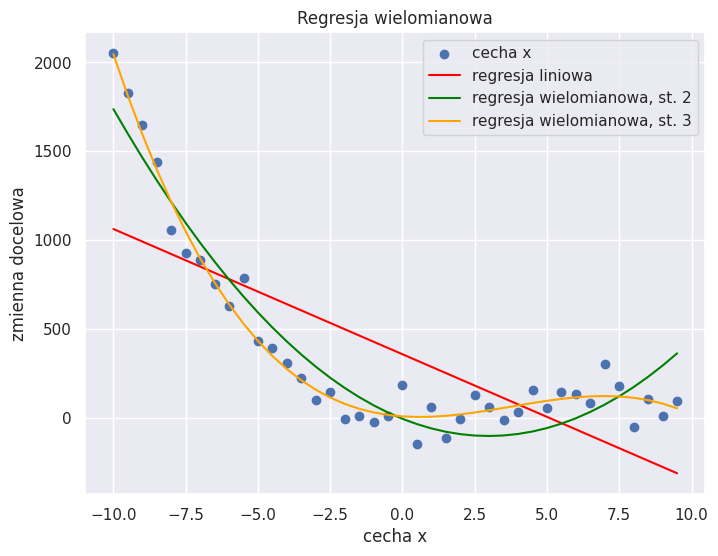

In [25]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [27]:
r2_score(y, y_pred_3)

0.9745348062334285

In [28]:
r2_score(y, y_pred_lin)

0.5568355989309897

###  <a name='8'></a> Porównanie metryk

In [29]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [30]:
results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
    })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.556836,294.675877,131396.851603,362.487036
1,regresja wielomianowa st. 2,0.912552,146.498366,25928.029173,161.021828
2,regresja wielomianowa st. 3,0.974535,63.584584,7550.349889,86.892749


In [31]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [32]:
px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [33]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

In [34]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')

In [35]:
poly = PolynomialFeatures(degree=4)

X_poly_4 = poly.fit_transform(X)
X_poly_4

array([[    1.    ,   -10.    ,   100.    , -1000.    , 10000.    ],
       [    1.    ,    -9.5   ,    90.25  ,  -857.375 ,  8145.0625],
       [    1.    ,    -9.    ,    81.    ,  -729.    ,  6561.    ],
       [    1.    ,    -8.5   ,    72.25  ,  -614.125 ,  5220.0625],
       [    1.    ,    -8.    ,    64.    ,  -512.    ,  4096.    ],
       [    1.    ,    -7.5   ,    56.25  ,  -421.875 ,  3164.0625],
       [    1.    ,    -7.    ,    49.    ,  -343.    ,  2401.    ],
       [    1.    ,    -6.5   ,    42.25  ,  -274.625 ,  1785.0625],
       [    1.    ,    -6.    ,    36.    ,  -216.    ,  1296.    ],
       [    1.    ,    -5.5   ,    30.25  ,  -166.375 ,   915.0625],
       [    1.    ,    -5.    ,    25.    ,  -125.    ,   625.    ],
       [    1.    ,    -4.5   ,    20.25  ,   -91.125 ,   410.0625],
       [    1.    ,    -4.    ,    16.    ,   -64.    ,   256.    ],
       [    1.    ,    -3.5   ,    12.25  ,   -42.875 ,   150.0625],
       [    1.    ,    -3.    ,   

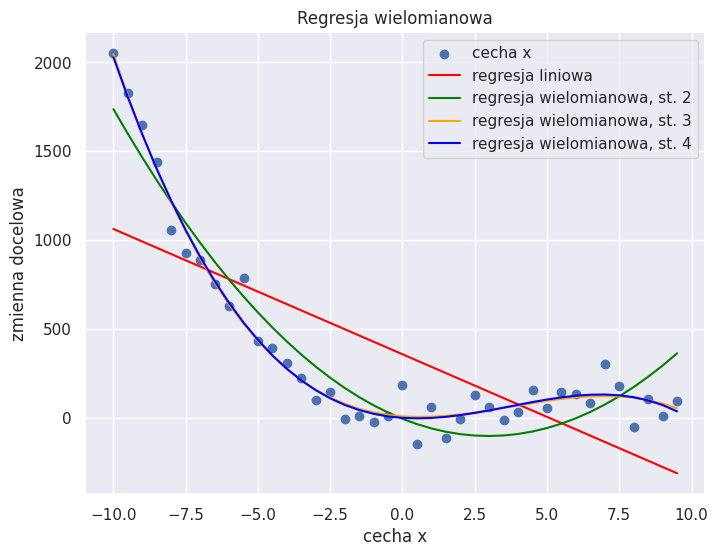

In [37]:
regressor_poly_4 = LinearRegression()
regressor_poly_4.fit(X_poly_4, y)

y_pred_4 = regressor_poly_4.predict(X_poly_4)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.plot(X, y_pred_4, c='blue', label='regresja wielomianowa, st. 4')
plt.legend()
plt.show()

In [39]:
r2_score(y, y_pred_4)

0.9747188869258537

In [40]:
r2_score(y, y_pred_3)


0.9745348062334285